<center><h1><b>7주차 ✅ ML</b></h1></center>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [27]:
"""
def get_font_family():
    '''
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    '''
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum - qq > /dev/null
        !fc-cache - fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family


# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
"""


-----
### 데이터 불러오기

In [2]:
# 데이터 가져오기
raw = pd.read_csv('data/insurance/insurance.csv')
raw.shape

(1338, 7)

In [3]:
raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
raw.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### 데이터 살펴보기

In [5]:
# null 데이터가 없다.
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# 수치형 데이터
raw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# 범주형 데이터
raw.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


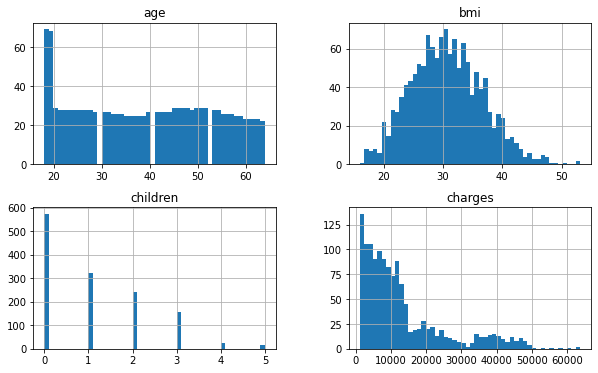

In [101]:
# 전체적인 분포 살펴보기
# charges가 0에 가까이 분포되어 있다.
# bmi 정규분포를 따르는 듯?
# children -> 범주형으로
_ = raw.hist(figsize=(10, 6), bins=50)

In [9]:
raw.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
# 성별
raw['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
# 자녀의 수
# 자녀가 없는 사람이 대부분
raw['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [12]:
# south, north
# east, west
raw['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
# 담배를 피는지 아닌지
# 안피는 사람이 더 많다.
raw['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [92]:
# 64-18+1 = 47개
# 18 ~ 64세 까지의 모든 나이다 있음.
print(raw['age'].nunique())
raw['age'].min(), raw['age'].max()

47


(18, 64)

---

### 시각화

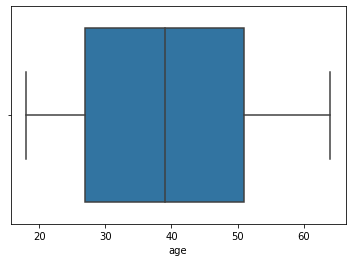

In [66]:
# 나이 박스 plot
_ = sns.boxplot(data=raw, x='age')

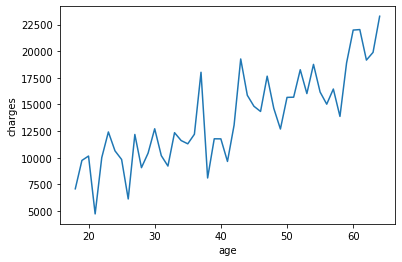

In [71]:
# 나이에 따른 보험료
_ = sns.lineplot(data=raw, x='age', y='charges', ci=None)

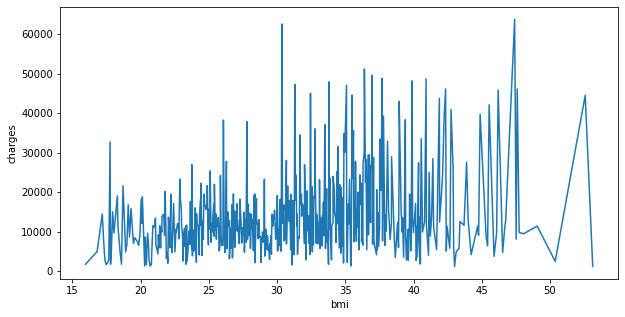

In [77]:
# bmi 에 따른 보험료
# 치솟았다가 내려오고를 반복하는걸 보면 bmi가 각각으로 고유해서 그런듯?
plt.figure(figsize=(10, 5))
_ = sns.lineplot(data=raw, x='bmi', y='charges', ci=None)

age
64    23275.530837
61    22024.457609
60    21979.418507
63    19884.998461
43    19267.278653
Name: charges, dtype: float64

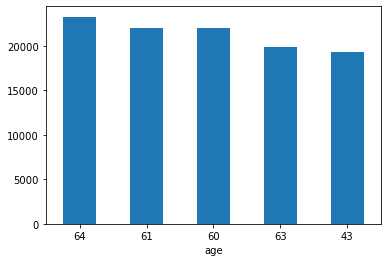

In [113]:
# 평균 보험료가 가장 높은 나이 top 5
age_chr_top5 = raw.groupby('age')['charges'].mean().sort_values(ascending=False).head()
display(age_chr_top5)
_ = age_chr_top5.plot.bar(rot=0)

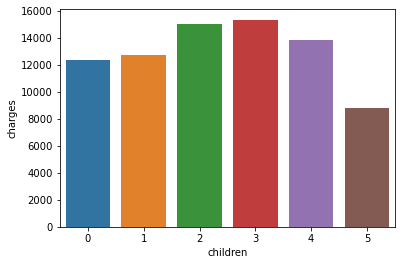

In [14]:
# 자녀의 수에 따른 보험료
_ = sns.barplot(data=raw, x='children', y='charges', ci=None)

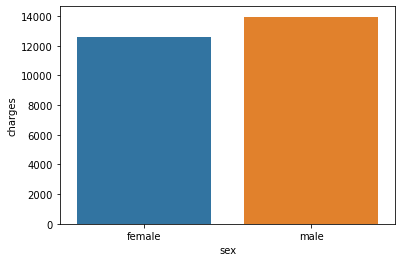

In [15]:
# 성별에 따른 보험료
_ = sns.barplot(data=raw, x='sex', y='charges', ci=None)

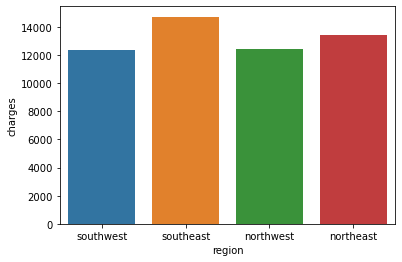

In [16]:
# 사는 지역에 따른 보험료
_ = sns.barplot(data=raw, x='region', y='charges', ci=None)

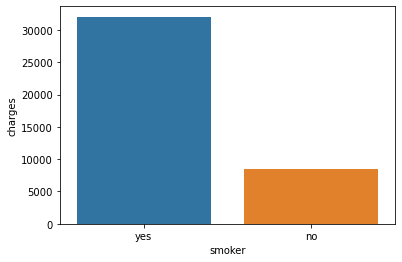

In [27]:
# 담배여부에 따른 보험료
_ = sns.barplot(data=raw, x='smoker', y='charges', ci=None)

In [124]:
# 사는 지역에 따른 흡연자 보험료 (성별)
pd.pivot_table(
    data=raw, index=['region', 'smoker'], columns='sex', values='charges',
    aggfunc='mean')

sex                     female          male
region    smoker                            
northeast no       9640.426984   8664.042222
          yes     28032.046398  30926.252583
northwest no       8786.998679   8320.689321
          yes     29670.824946  30713.181419
southeast no       8440.205552   7609.003587
          yes     33034.820716  36029.839367
southwest no       8234.091260   7778.905534
          yes     31687.988430  32598.862854

In [121]:
"""
흡연자일때, 남성이 보험료가 높다.
흡연자가 아닐 시에는 여성이 보험료가 대체적으로 높다.
southeast 흡연자 남성이 카테고리에서 보험료가 제일 높다.
미국 남동부에는 텍사스, 미시시피, 플로리다 등이 있다.
"""

fig = px.histogram(
    raw, x='region', y='charges',
    color='sex', barmode='group', facet_col='smoker',
    histfunc='avg', category_orders={'sex': ['male', 'female']}
)
fig.update_layout(title='사는 지역에 따른 성별 평균 보혐료 (흡연자여부)')


In [122]:
# 담배를 피지 않을 때는 여자가 보험료가 높고,
# 담배를 필 때는 남자가 보험료가 높다.
fig = px.histogram(
    raw, x='smoker', y='charges', color='sex', barmode='group',
    histfunc='avg', text_auto=True,
    title='성별에 따른 흡연여부별 평균 보험료',
    category_orders={'smoker': ['yes', 'no'], 'sex': ['male', 'female'],}
)
fig.update_traces(
    texttemplate="$%{y:,d}"
)

In [133]:
fig = px.histogram(
    raw, x='region', y='charges',
    color='children', barmode='group', 
    histfunc='avg', category_orders={'children': [0, 1, 2, 3, 4, 5]}
)
fig.update_layout(title='사는 지역에 따른 자녀수별 평균 보혐료')
